<a href="https://colab.research.google.com/github/owes295/9-Days-python-progect/blob/main/Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset Preview:
    Experience  Age  ProjectHandled  WorkingHours  Educationlevel  \
0           7   23              12            31               1   
1           4   24              18            49               3   
2          13   58               3            54               3   
3          11   38               1            35               1   
4           8   23               1            30               2   

   PerformanceScore  Salary  Attrition  
0                 2   73060          0  
1                 3   88156          0  
2                 2  100146          1  
3                 2   74164          0  
4                 3   62469          0  


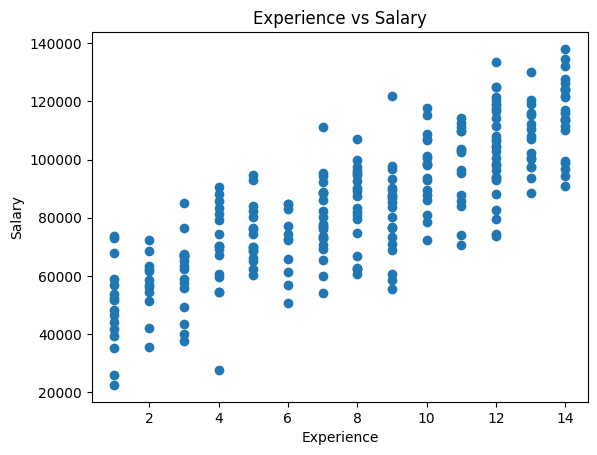

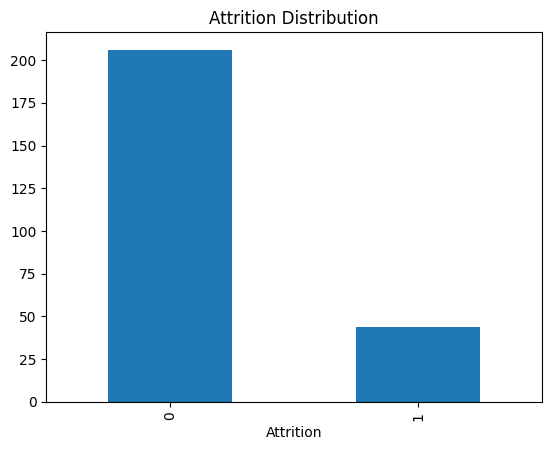

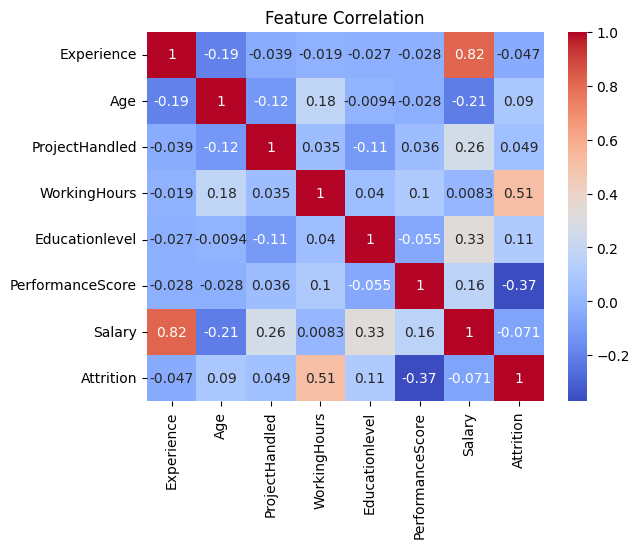


Salary Prediction Results
R2 Score: 0.9260139915653668
RMSE: 5956.81759098102


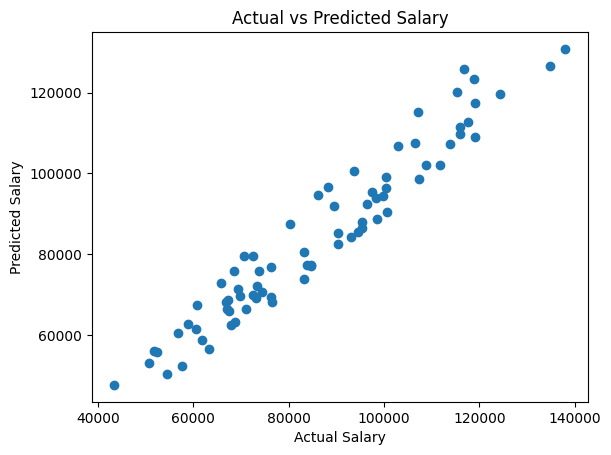


Attrition Prediction Results
Accuracy: 1.0
Confusion Matrix:
 [[61  0]
 [ 0 14]]
Cross Validation Score: 1.0


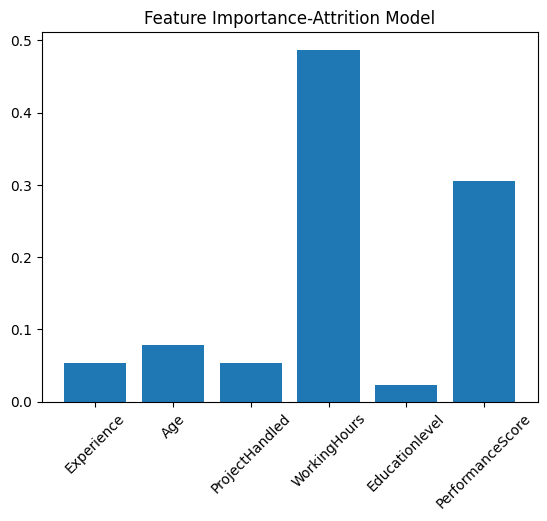


Project Completed Succesfully


In [2]:
# step 1: Import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score, confusion_matrix

np.random.seed(42)

#step 2: create Synthetic HR Dataset

data = pd.DataFrame({
    "Experience": np.random.randint(1,15,250),
    "Age": np.random.randint(22,60,250),
    "ProjectHandled": np.random.randint(1,20,250),
    "WorkingHours": np.random.randint(30,60,250),
    "Educationlevel": np.random.randint(1,5,250),
    "PerformanceScore": np.random.randint(1,5,250)
    })

# Salary Formula (Regression Target)

data["Salary"] = (
    data["Experience"] * 5000 +
    data["Educationlevel"] * 8000 +
    data["ProjectHandled"] * 1500 +
    data["PerformanceScore"] * 4000 +
    np.random.randint(-10000,10000,250)
)

#Attribute Formula (Classification Target)
data["Attrition"] = np.where(
    (data["WorkingHours"] > 50)&
    (data["PerformanceScore"] < 3), 1, 0
)

print("Dataset Preview:\n",data.head())

#Step 3: Exploratory Data Analysis

#Plot 1:Experience vs Salary
plt.figure()
plt.scatter(data["Experience"],data["Salary"])
plt.title("Experience vs Salary")
plt.xlabel("Experience")
plt.ylabel("Salary")
plt.show()

#plot 2: Attrition Count
plt.figure()
data["Attrition"].value_counts().plot(kind="bar")
plt.title("Attrition Distribution")
plt.show()

#Plot 3: Correlation Heatmap
plt.figure()
sns.heatmap(data.corr(),annot=True, cmap="coolwarm")
plt.title("Feature Correlation")
plt.show()

# step 4: Salary Prediction (Regression)

X_reg = data.drop(["Salary","Attrition"],axis=1)
y_reg = data["Salary"]

X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
    X_reg, y_reg, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_reg_scaled = scaler.fit_transform(X_train_reg)
X_test_reg_scaled = scaler.transform(X_test_reg)

reg_model = LinearRegression()
reg_model.fit(X_train_reg_scaled, y_train_reg)

y_pred_reg = reg_model.predict(X_test_reg_scaled)

print("\nSalary Prediction Results")
print("R2 Score:",r2_score(y_test_reg, y_pred_reg))
print("RMSE:", np.sqrt(mean_squared_error(y_test_reg, y_pred_reg)))

# plot 4:actual vs predicted salary
plt.figure()
plt.scatter(y_test_reg, y_pred_reg)
plt.xlabel("Actual Salary")
plt.ylabel("Predicted Salary")
plt.title("Actual vs Predicted Salary")
plt.show()

# step 5 : Attrition Prediction (Classification)

x_clf = data.drop(["Salary","Attrition"],axis=1)
y_clf = data["Attrition"]

x_train_c,x_test_c,y_train_c,y_test_c = train_test_split(
    x_clf,y_clf,test_size=0.3,random_state=42
)
rf_model = RandomForestClassifier(n_estimators=100,random_state=42)
rf_model.fit(x_train_c,y_train_c)

y_pred_c = rf_model.predict(x_test_c)

print("\nAttrition Prediction Results")
print("Accuracy:",accuracy_score(y_test_c,y_pred_c))
print("Confusion Matrix:\n",confusion_matrix(y_test_c,y_pred_c))

# cross validation
cv_score = cross_val_score(rf_model,x_clf,y_clf,cv=5)
print("Cross Validation Score:",cv_score.mean())

# plot 5 : Feature Impotance

importance = rf_model.feature_importances_
features = x_clf.columns

plt.figure()
plt.bar(features,importance)
plt.xticks(rotation=45)
plt.title("Feature Importance-Attrition Model")
plt.show()

print("\nProject Completed Succesfully")